In [53]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [54]:
conn = sqlite3.connect("../db.sqlite3")

query_order = "SELECT * FROM restaurant_order;"
df_order = pd.read_sql_query(query_order, conn)
query_orderitem = "SELECT * FROM restaurant_orderitem;"
df_orderitem = pd.read_sql_query(query_orderitem, conn)
query_product = "SELECT * FROM restaurant_product;"
df_product = pd.read_sql_query(query_product, conn)

df_order.rename(columns={'id': 'order_id'}, inplace=True)
df_orderitem.rename(columns={'id': 'orderitem_id'}, inplace=True)
df_product.rename(columns={'id': 'product_id'}, inplace=True)

combined_df = pd.merge(df_order, df_orderitem, left_on="order_id", right_on="order_id")
combined_df = pd.merge(combined_df, df_product, left_on="product_id", right_on="product_id")

combined_df.to_csv("combined_data.csv", index=False)
conn.close()

df = pd.read_csv("combined_data.csv")
print(len(df))

74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

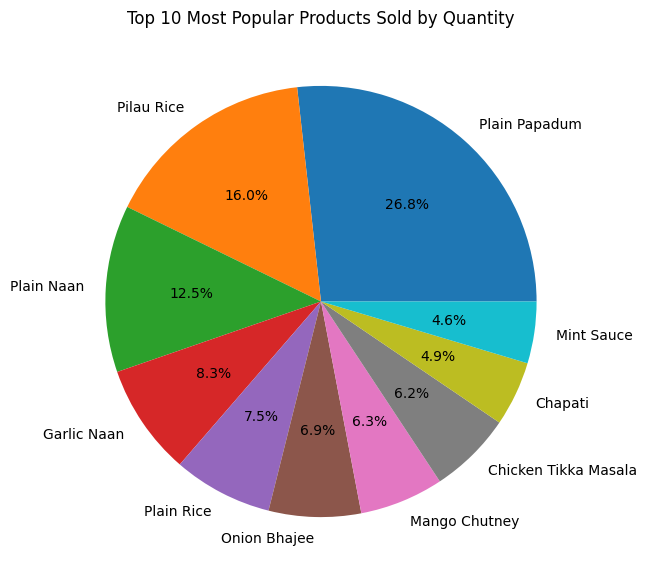

In [55]:
df = pd.read_csv("combined_data.csv")
product_counts = df.groupby("name")["quantity"].sum()
top_10_products = product_counts.nlargest(10)
plt.figure(figsize=(10, 7))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%')
plt.title("Top 10 Most Popular Products Sold by Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

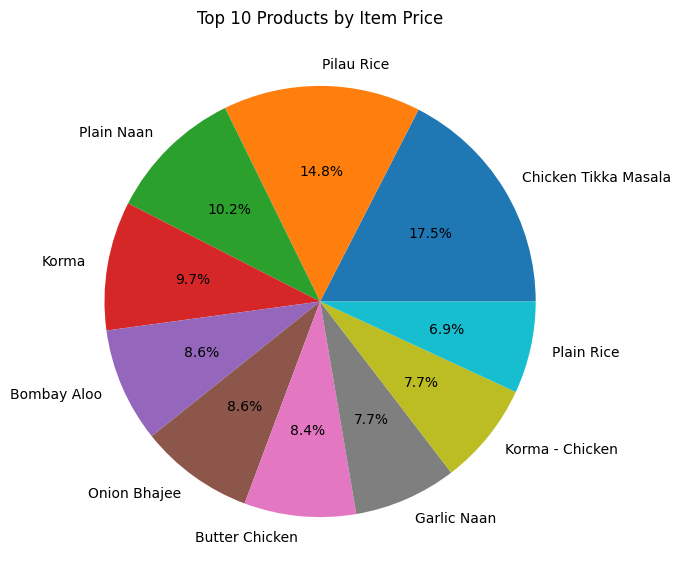

In [56]:
df = pd.read_csv("combined_data.csv")
df["item_price"] = df["price"] * df["quantity"]
product_revenue = df.groupby("name")["item_price"].sum()
top_10_products_revenue = product_revenue.nlargest(10)
plt.figure(figsize=(10, 7))
plt.pie(top_10_products_revenue, labels=top_10_products_revenue.index, autopct='%1.1f%%')
plt.title("Top 10 Products by Item Price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

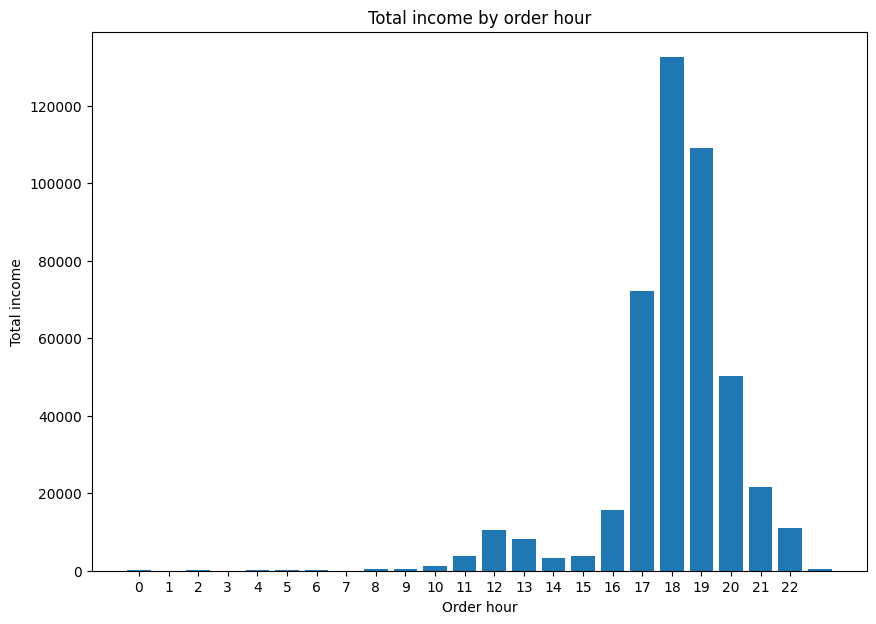

In [57]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
hourly_revenue = df.groupby("order_hour")["item_price"].sum()
plt.figure(figsize=(10, 7))
plt.bar(hourly_revenue.index, hourly_revenue)
plt.xlabel("Order hour")
plt.ylabel("Total income")
plt.title("Total income by order hour")
plt.xticks(range(23))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

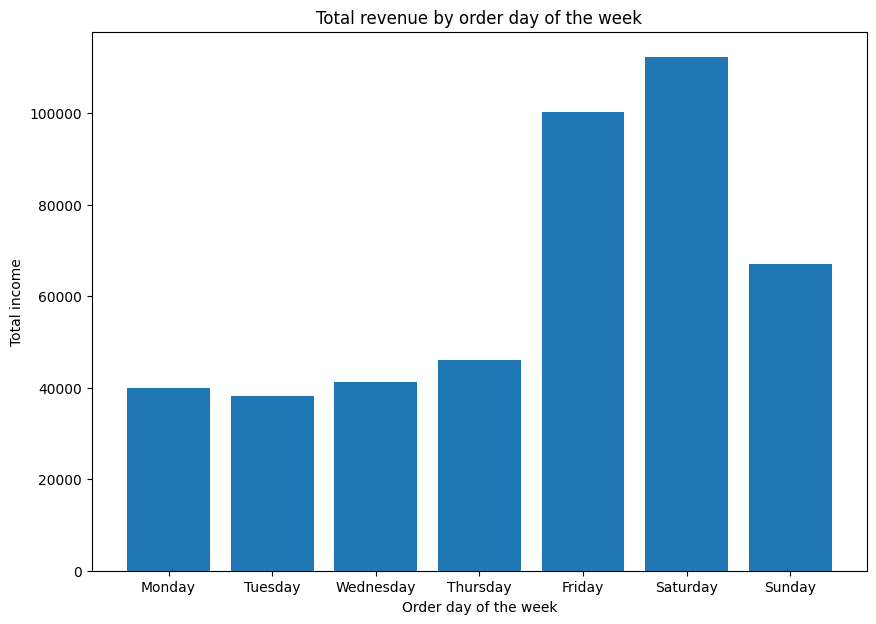

In [58]:
df["order_day_of_the_week"] = df["datetime"].dt.day_name()
daily_revenue = df.groupby("order_day_of_the_week")["item_price"].sum()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_revenue = daily_revenue.loc[order]

plt.figure(figsize=(10, 7))
plt.bar(daily_revenue.index, daily_revenue)
plt.xlabel("Order day of the week")
plt.ylabel("Total income")
plt.title("Total revenue by order day of the week")
plt.show()